In [ ]:
!git clone https://github.com/HUMANITICS/ml-test.git
%cd ml-test

[Errno 2] No such file or directory: 'ml-test'
/content/drive/MyDrive/store_retail/ml-test


In [ ]:
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("stores_sales.csv")
print(f"The shape of this data is {df.shape}")
df.head(6)

The shape of this data is (6435, 8)


,store,date,weekly_sales,holiday_flag,temperature,fuel_Price,cpi,unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106


In [ ]:
df['holiday_flag'].unique()

array([0, 1])

In [ ]:
df.index = pd.to_datetime(df['date'] , format = "%d-%m-%Y")
df.drop(["date"] , axis=1 , inplace=True)
df.head(3)

,store,weekly_sales,holiday_flag,temperature,fuel_Price,cpi,unemployment
date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106


Dealing with times in the time domain instead of dealing with them as strings. This will facilitate the preprocessing step.

In [ ]:
np.var(df["store"].value_counts())

0.0

The variance of the number of samples per store is zero, meaning all the stores consists of the same weekly time step.

In [ ]:
# full_df.groupby(full_df.date_time.dt.hour).transform('median')
n , m = len(df["store"].value_counts()) , df["store"].value_counts()[1]

print(f"The number of stores in this study is {n}. Every single store consists of {m} weekly time step.")

The number of stores in this study is 45. Every single store consists of 143 weekly time step.


The following code snippet check the time domain of each store of the 45 store of study and check if there are some missing time steps in each. The list **l** contain the number of missing time step for each store record.

In [ ]:
l = []

for i in df["store"].unique():

    df_store = df[df["store"] == i]
    all_date_ranges = pd.date_range(start=df_store.index.min(), end=df_store.index.max(), freq='W-FRI')

    missing_dates = all_date_ranges[~all_date_ranges.isin(df_store.index)]

    l.append(len(missing_dates))

del df_store

max(l) is zero, so there are no missing time steps in all stores records.

In [ ]:
max(l)

0

The following function plot the data of randomly picked 4 stores for a given feature (A continous variable) if stores_id is not provided, on the onther if the list provided contains 4 or more stores id, the function will return the plots of the given store ids. In the case of our data, the continous variable may be one of these features : weekly_sales , temperature	, fuel_Price , cpi or unemployment).

In [ ]:
def plotting(df = df , feature = "weekly_sales" , stores_id = [] ):

    if len(stores_id)>=4:

        stores = stores_id[:4]

    else:
        stores = random.sample(range(1, len(df["store"].unique()+1)), 4)


    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()


    for store_id , ax in  zip(stores , axes):

        ax.plot(df[df["store"]==store_id][feature])
        ax.set_title(f'Weekly {feature} of Store {store_id}')
        ax.set_xlabel('Date')
        ax.set_ylabel(f"{feature}")
        ax.legend()

In [ ]:
# plotting(stores_id = [1,3,20,18])

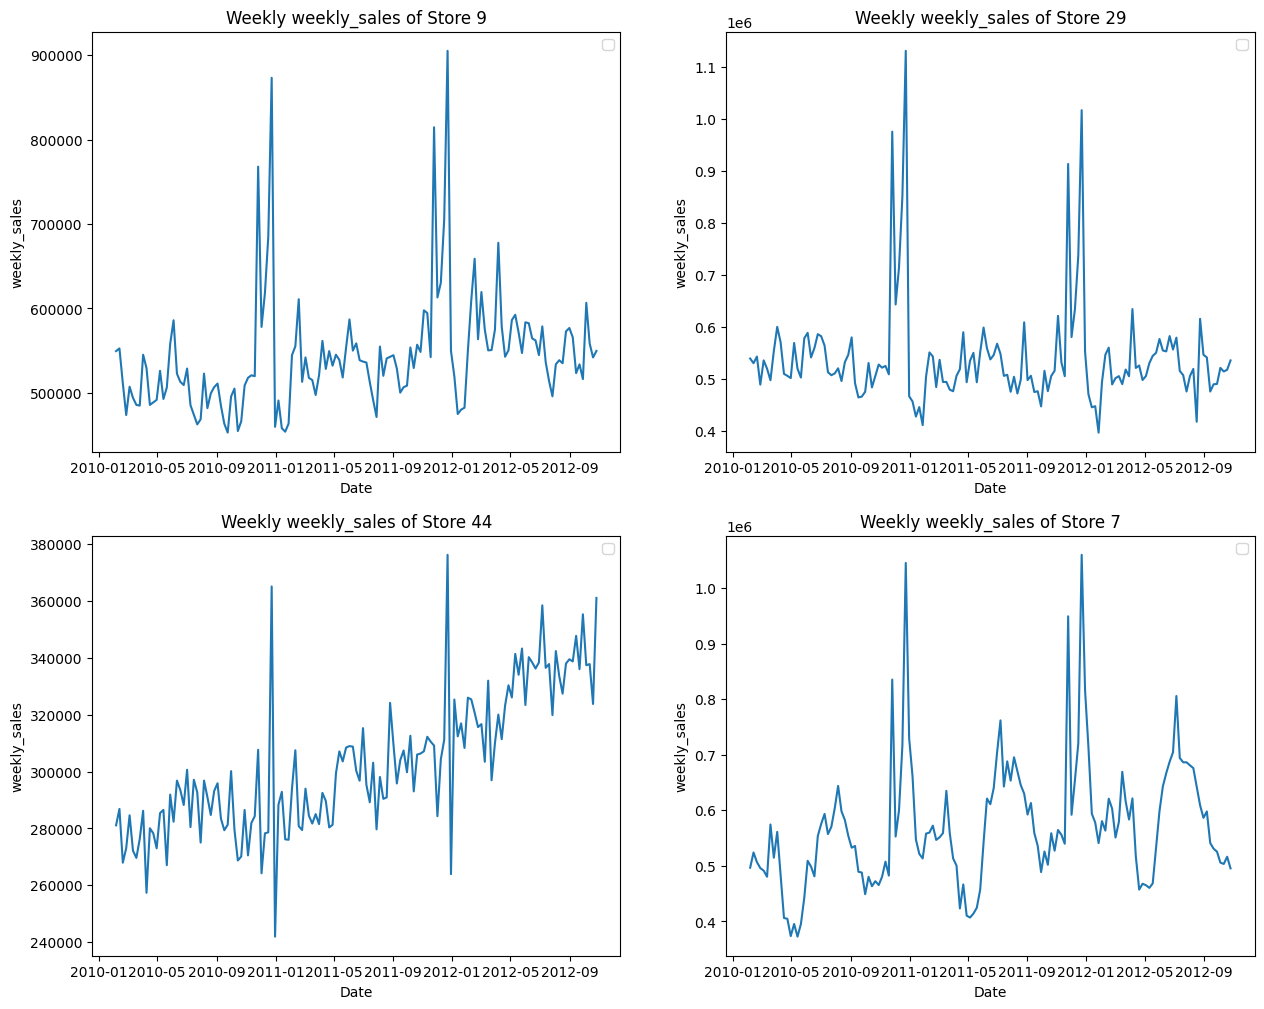

In [ ]:
plotting()

We remark that for for most of stores the continous variable weekly_sales (our target variable), preserve the same internal structure. That is, there is a monthly seasonality (each 4 weeks). We remark as well, that the same pattern is repeated in most of stores records. That is, in each year there is a peak, we need to zoom the data to explore in which month exctly this peak occurs.

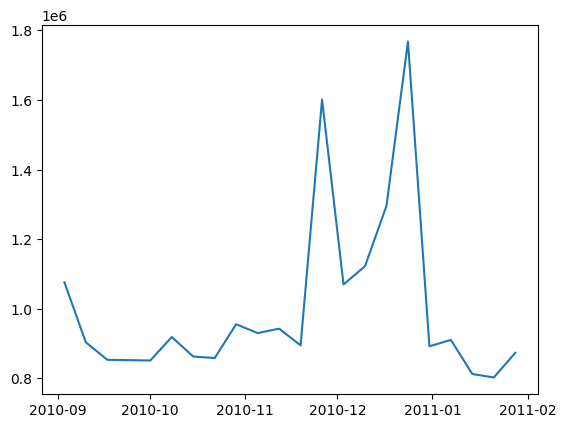

In [ ]:
start_date = '2010-09-01'
end_date = '2011-01-30'
plt.plot(df[df["store"]==12]["weekly_sales"][start_date:end_date])

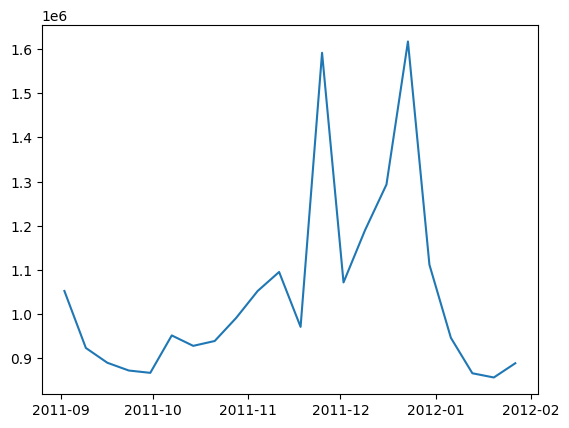

In [ ]:
start_date = '2011-09-01'
end_date = '2012-01-30'
plt.plot(df[df["store"]==12]["weekly_sales"][start_date:end_date])

The peak occurs in the last of December. It is very likely that this is due to Cristmans holidays.

Starting now, we can infer that only the stores offering products unrelated to Christmas won't have this peak in the last of December.

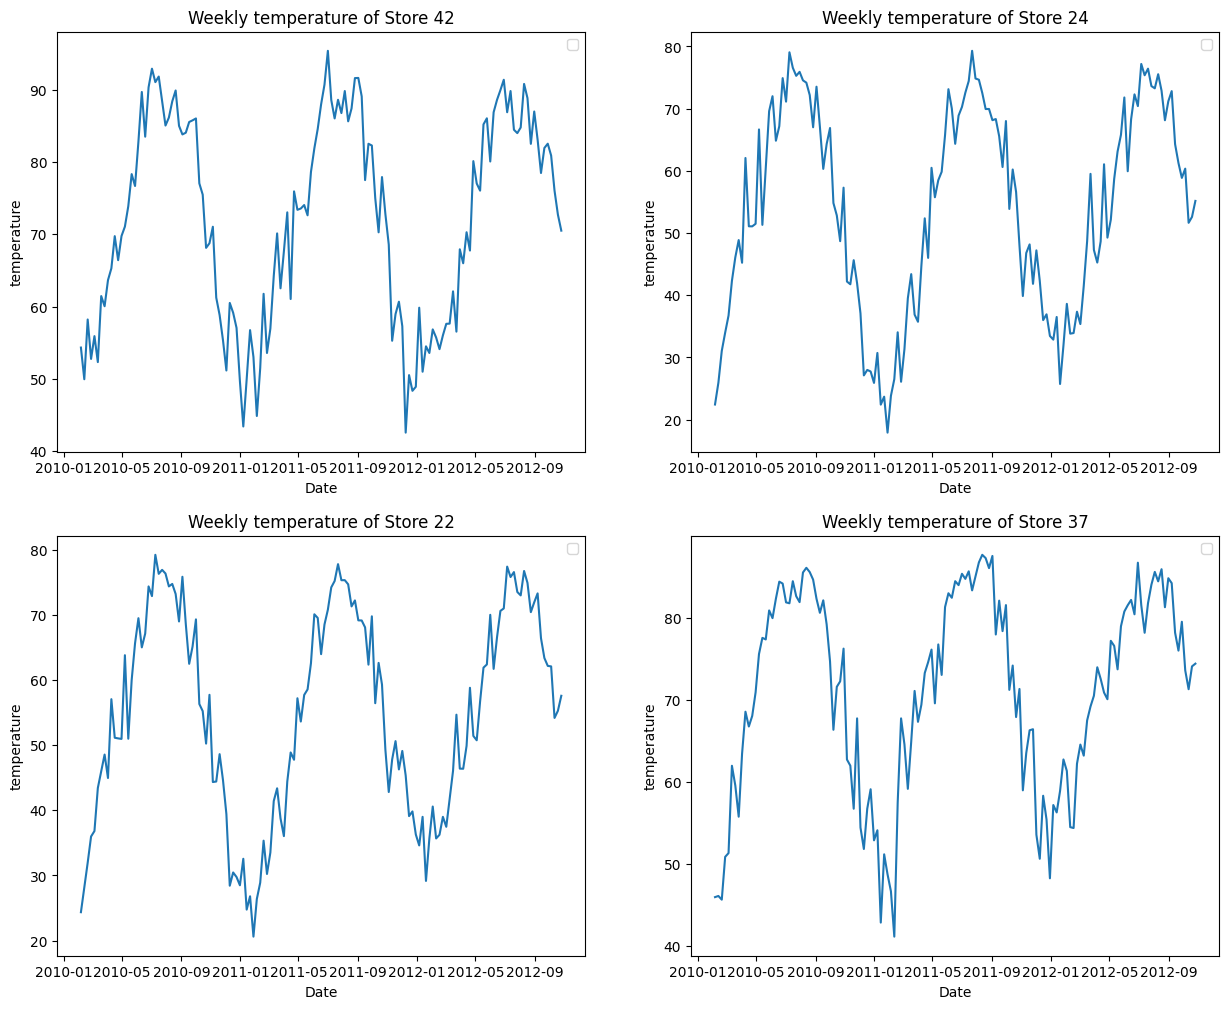

In [ ]:
plotting(feature = "temperature")

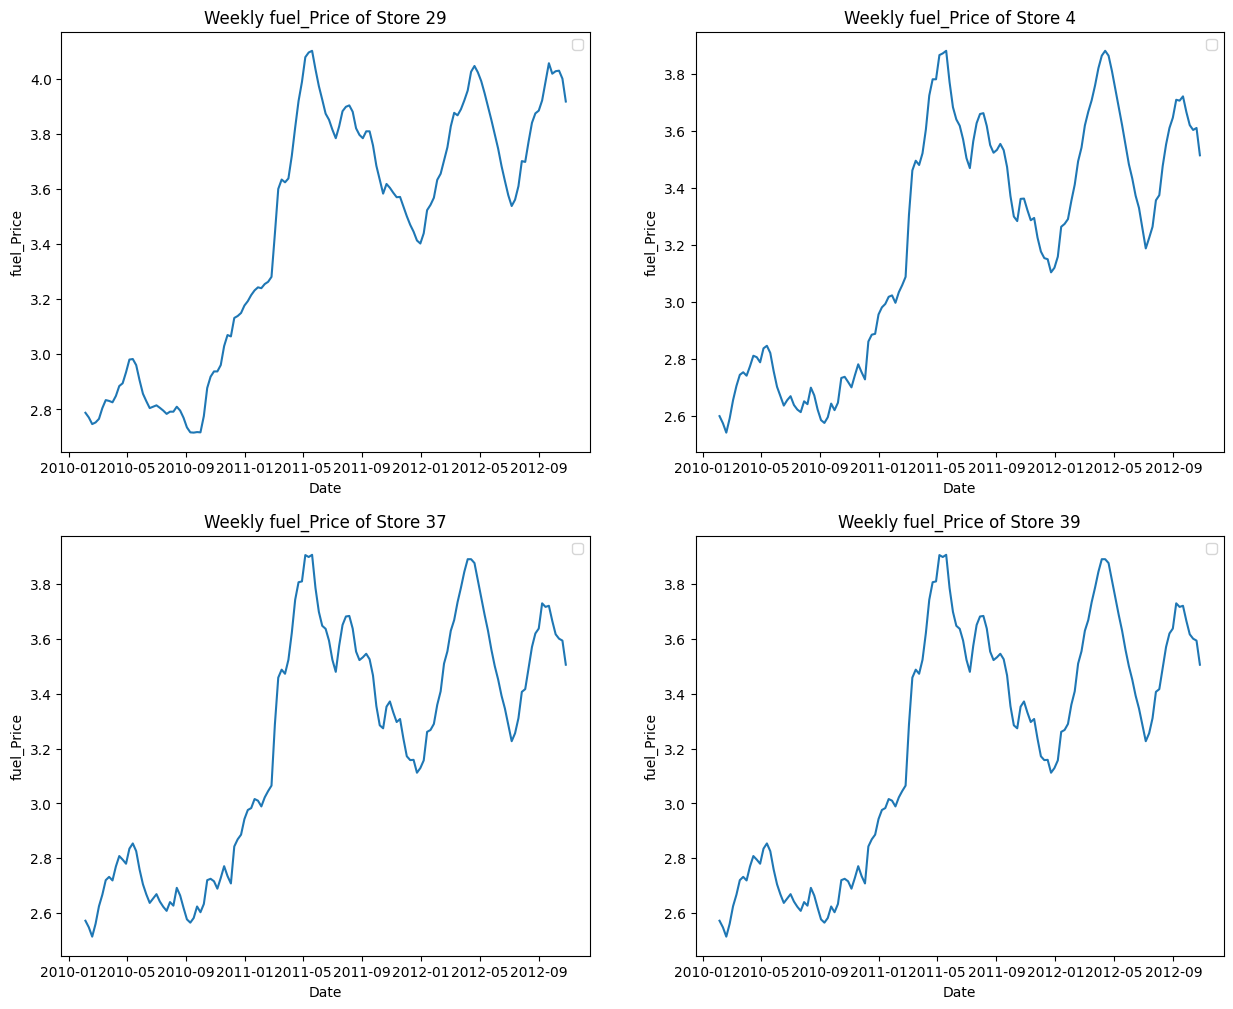

In [ ]:
plotting(feature = "fuel_Price")

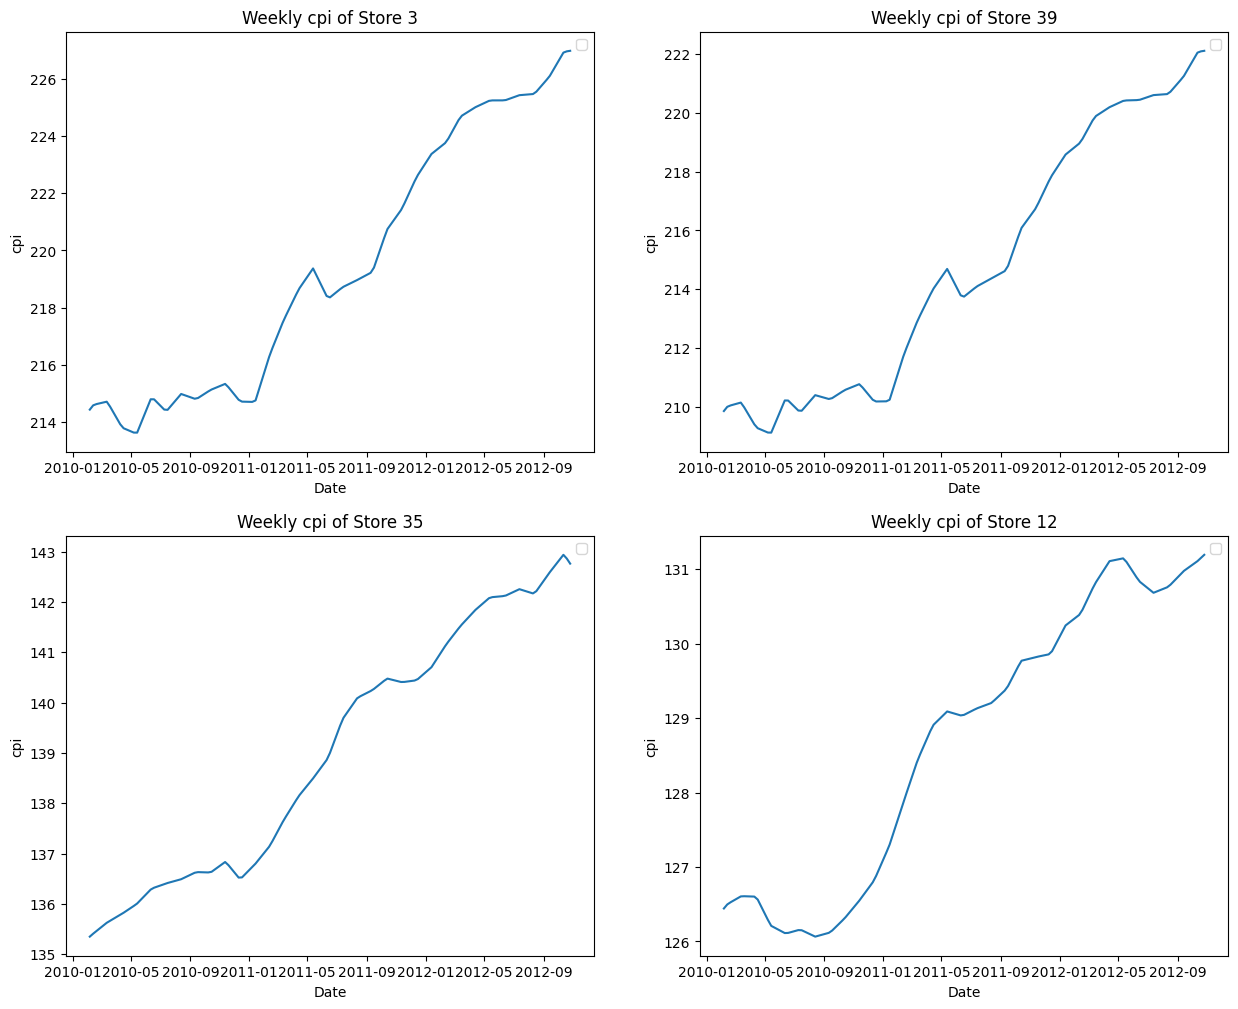

In [ ]:
plotting(feature = "cpi")

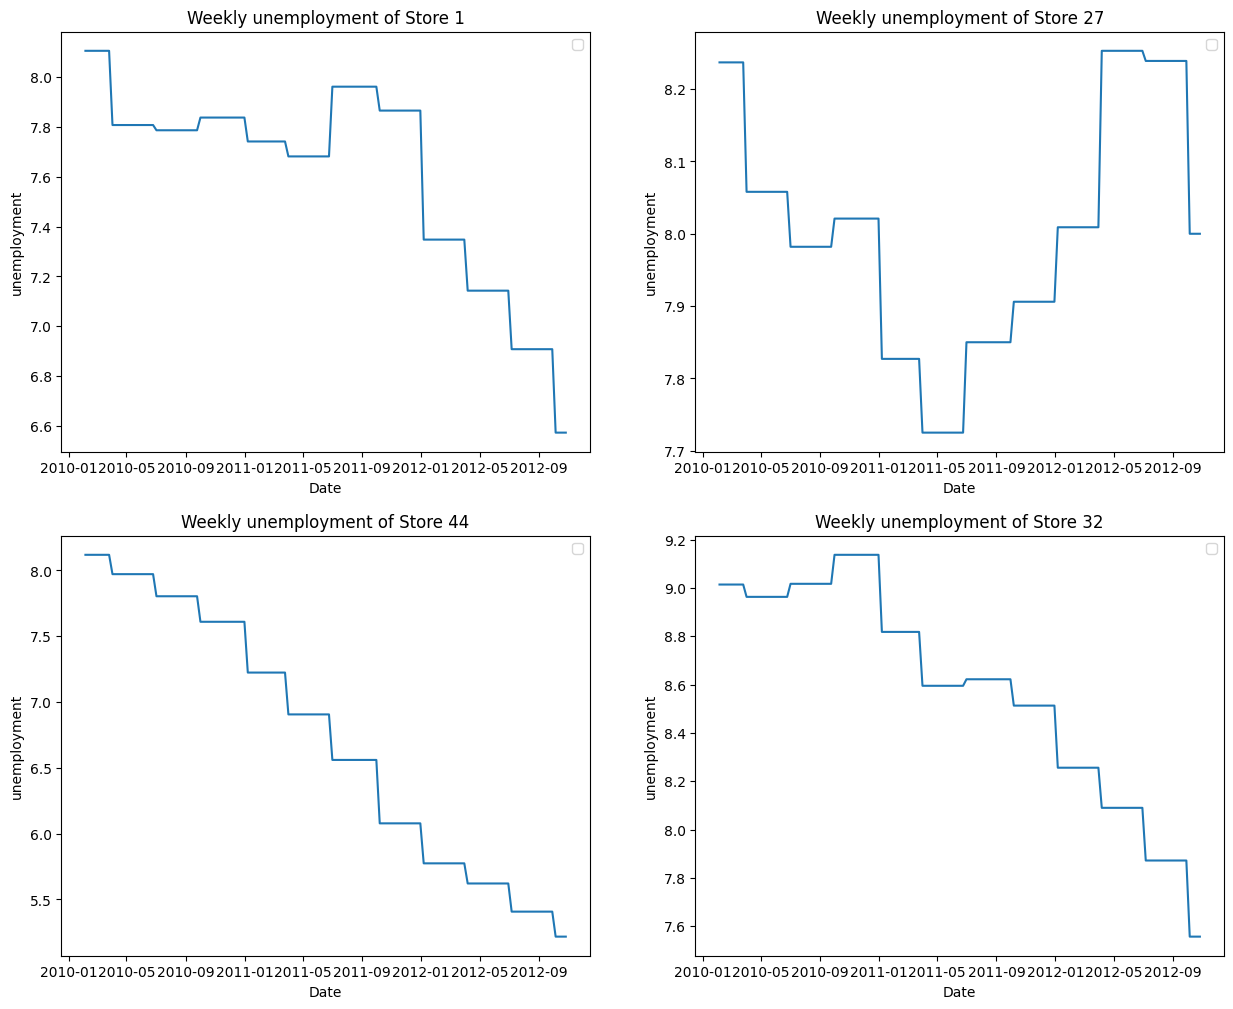

In [ ]:
plotting(feature = "unemployment")

In [ ]:
df.head()

,store,weekly_sales,holiday_flag,temperature,fuel_Price,cpi,unemployment
date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

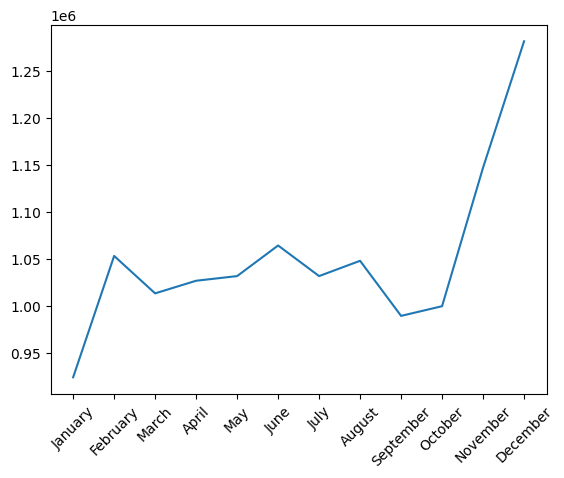

In [ ]:
months  = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
mean_monthly_sales = df.groupby([df.index.month])['weekly_sales'].mean()
plt.plot(months , mean_monthly_sales)
plt.xticks(rotation=45)

We remark that the mean of weekly sales over all the stores has its highest values at December while its lowest value on Junnary.